In [1]:
import matplotlib.pylab as plt
import numpy as np

In [2]:
import os

In [3]:
CaMcases= ['linkerCoil','linkerHelix'] #'linkerCoilimpairedDomain',
CaMBRcases = ['CaMBRhelix','CaMBRcoil']
ionics = ["0M","0.15M","0.5M"]



def readContacts(cam,cambr,ion,N=201):
    alldata = []
    for z in np.arange(1,N):
        temp = np.loadtxt(os.path.join(os.getcwd(),"martinicg",'DomainConstraint',cam,cambr,ion,str(z),"contacts"),\
                   comments="#")
        alldata.append(temp)
    return alldata

In [4]:
def readRMSD(cam,cambr,ion,N=201):
    rmsddata = []
    for z in np.arange(1,N):
        temp = np.loadtxt(os.path.join(os.getcwd(),"martinicg",'DomainConstraint',cam,cambr,ion,str(z),"rmsd.dat"),\
                   comments="#")
        rmsddata.append(temp)
        
    return rmsddata



def readDis(cam,cambr,ion,N=201):
    disdata = []
    for z in np.arange(1,N):
        temp2 = np.loadtxt(os.path.join(os.getcwd(),"martinicg",'DomainConstraint',cam,cambr,ion,str(z),"dis.dat"),\
                   comments="#")
        disdata.append(temp2)
        
    return disdata

In [46]:
contact = {i:{} for i in CaMcases }


In [47]:
for i in ['linkerCoil','linkerHelix']:#,'linkerHelix']: #'linkerCoilimpairedDomain']:
    #contact[i]['CaMBRcoil'] = {j:readContacts(i,'CaMBRcoil',j) for j in ionics}
    contact[i]['CaMBRhelix'] = {j:readContacts(i,'CaMBRhelix',j) for j in ionics}

In [48]:
contact['linkerHelix']['CaMBRcoil'] = {}

In [49]:
contact['linkerHelix']['CaMBRcoil']['0M'] = readContacts('linkerHelix','CaMBRcoil','0M',N=101)
contact['linkerHelix']['CaMBRcoil']['0.15M'] = readContacts('linkerHelix','CaMBRcoil','0.15M',N=101)

In [50]:
contact['linkerCoil']['CaMBRcoil'] = {}
contact['linkerCoil']['CaMBRcoil']['0M'] = readContacts('linkerCoil','CaMBRcoil','0M',N=101)
contact['linkerCoil']['CaMBRcoil']['0.15M'] = readContacts('linkerCoil','CaMBRcoil','0.15M',N=101)

In [10]:
rmsd = {i:{} for i in CaMcases }
for i in ['linkerCoil','linkerHelix']:#,'linkerHelix']: #'linkerCoilimpairedDomain']:
    #rmsd[i]['CaMBRcoil'] = {j:readRMSD(i,'CaMBRcoil',j) for j in ionics}
    rmsd[i]['CaMBRhelix'] = {j:readRMSD(i,'CaMBRhelix',j) for j in ionics}


In [11]:
rmsd['linkerHelix']['CaMBRcoil'] = {}
rmsd['linkerHelix']['CaMBRcoil']['0M'] = readRMSD('linkerHelix','CaMBRcoil','0M',N=101)
rmsd['linkerHelix']['CaMBRcoil']['0.15M'] = readRMSD('linkerHelix','CaMBRcoil','0.15M',N=101)

In [12]:
rmsd['linkerCoil']['CaMBRcoil'] = {}
rmsd['linkerCoil']['CaMBRcoil']['0M'] = readRMSD('linkerCoil','CaMBRcoil','0M',N=101)
rmsd['linkerCoil']['CaMBRcoil']['0.15M'] = readRMSD('linkerCoil','CaMBRcoil','0.15M',N=101)

In [13]:
dis = {i:{} for i in CaMcases }

for i in ['linkerCoil','linkerHelix']:#,'linkerHelix']: #'linkerCoilimpairedDomain']:
    #rmsd[i]['CaMBRcoil'] = {j:readRMSD(i,'CaMBRcoil',j) for j in ionics}
    dis[i]['CaMBRhelix'] = {j:readDis(i,'CaMBRhelix',j) for j in ionics}



In [14]:
dis['linkerHelix']['CaMBRcoil'] = {}
dis['linkerHelix']['CaMBRcoil']['0M'] = readDis('linkerHelix','CaMBRcoil','0M',N=101)
dis['linkerHelix']['CaMBRcoil']['0.15M'] = readDis('linkerHelix','CaMBRcoil','0.15M',N=101)

In [15]:
dis['linkerCoil']['CaMBRcoil'] = {}
dis['linkerCoil']['CaMBRcoil']['0M'] = readDis('linkerCoil','CaMBRcoil','0M',N=101)
dis['linkerCoil']['CaMBRcoil']['0.15M'] = readDis('linkerCoil','CaMBRcoil','0.15M',N=101)

In [16]:
def contactTime(contact,Tm=10,N=200):
    """
    Time needed to achieve Tm contacts
    """
    Alltime = []
    Allindex = []
    for i in range(N):
        if len(contact[i].shape) > 1: 
            indx = np.argmax(np.sum(contact[i][:,1:3],axis=1)>Tm)
            Allindex.append(indx)
        #print (i)
            Time = contact[i][:,0][indx]
            Alltime.append(Time) 
    return Alltime,Allindex
        
        

In [17]:
def readRG(cam,cambr,ion,N=201):
    """
    Read in the radius of gyration for each trial
    """
    rgdata = []
    for z in np.arange(1,N):
        temp2 = np.loadtxt(os.path.join(os.getcwd(),"martinicg",'DomainConstraint',cam,cambr,ion,str(z),"RoG.dat"),\
                   comments="#")
        rgdata.append(temp2)
        
    return rgdata

In [51]:
RoG = {i:{} for i in CaMcases }
for i in ['linkerCoil','linkerHelix']:#,'linkerHelix']: #'linkerCoilimpairedDomain']:
    #rmsd[i]['CaMBRcoil'] = {j:readRMSD(i,'CaMBRcoil',j) for j in ionics}
    RoG[i]['CaMBRhelix'] = {j:readRG(i,'CaMBRhelix',j) for j in ionics}

In [52]:
RoG['linkerHelix']['CaMBRcoil'] = {}
RoG['linkerHelix']['CaMBRcoil']['0M'] = readRG('linkerHelix','CaMBRcoil','0M',N=101)
RoG['linkerHelix']['CaMBRcoil']['0.15M'] = readRG('linkerHelix','CaMBRcoil','0.15M',N=101)

In [53]:
RoG['linkerCoil']['CaMBRcoil'] = {}
RoG['linkerCoil']['CaMBRcoil']['0M'] = readRG('linkerCoil','CaMBRcoil','0M',N=101)
RoG['linkerCoil']['CaMBRcoil']['0.15M'] = readRG('linkerCoil','CaMBRcoil','0.15M',N=101)

In [54]:
TmTime = {i:{} for i in CaMcases}

In [55]:
for i in ['linkerCoil','linkerHelix']: #,'linkerCoilimpairedDomain']:
    TmTime[i]['CaMBRhelix'] = {j:contactTime(contact[i]['CaMBRhelix'][j],Tm=50) for j in ionics}


In [56]:
TmTime['linkerHelix']['CaMBRcoil'] = {}
TmTime['linkerHelix']['CaMBRcoil']['0M'] = contactTime(contact['linkerHelix']['CaMBRcoil']['0M'],N=100)
TmTime['linkerHelix']['CaMBRcoil']['0.15M'] = contactTime(contact['linkerHelix']['CaMBRcoil']['0.15M'],N=100)

In [57]:
TmTime['linkerCoil']['CaMBRcoil'] = {}
TmTime['linkerCoil']['CaMBRcoil']['0M'] = contactTime(contact['linkerCoil']['CaMBRcoil']['0M'],N=100)
TmTime['linkerCoil']['CaMBRcoil']['0.15M'] = contactTime(contact['linkerCoil']['CaMBRcoil']['0.15M'],N=100)

In [59]:
def RGbeforeTm(TmIndex,RG):
    """
    Get the RG of CaM before forming the encounter complex
    """
    rg = []
    for i in range(len(TmIndex[1])):
        #print (i)
        idx = TmIndex[1][i]
        if idx > 1300:
            idx = 1300
        if idx == 0:
            idx = 1
        rg = rg + list(RG[i][:,1][:idx])
    return rg

In [29]:
#Note, lhch5M id 89, the CaMBR does not approach CaM in 2 us, ignore this trial

#native Model all CaM RG before encounter complex
lhch0m = RGbeforeTm(TmTime['linkerHelix']['CaMBRhelix']['0M'],RoG['linkerHelix']['CaMBRhelix']['0M'])
lhch15m = RGbeforeTm(TmTime['linkerHelix']['CaMBRhelix']['0.15M'],RoG['linkerHelix']['CaMBRhelix']['0.15M'])
lhch5m = RGbeforeTm(TmTime['linkerHelix']['CaMBRhelix']['0.5M'],RoG['linkerHelix']['CaMBRhelix']['0.5M'])

In [60]:
lcch0m = RGbeforeTm(TmTime['linkerCoil']['CaMBRhelix']['0M'],RoG['linkerCoil']['CaMBRhelix']['0M'])
lcch15m = RGbeforeTm(TmTime['linkerCoil']['CaMBRhelix']['0.15M'],RoG['linkerCoil']['CaMBRhelix']['0.15M'])
lcch5m = RGbeforeTm(TmTime['linkerCoil']['CaMBRhelix']['0.5M'],RoG['linkerCoil']['CaMBRhelix']['0.5M'])

In [164]:
t1 = np.histogram(lhch0m,bins=100,range=(14,24),density=True)
t2 = np.histogram(lhch15m,bins=100,range=(14,24),density=True)
t3 = np.histogram(lhch5m,bins=100,range=(14,24),density=True)


t4 = np.histogram(lcch0m,bins=100,range=(14,24),density=True)
t5 = np.histogram(lcch15m,bins=100,range=(14,24),density=True)
t6 = np.histogram(lcch5m,bins=100,range=(14,24),density=True)

In [156]:
def Gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))

In [157]:
# define a two peak gaussian
def GaussianTwoPeaks(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2)))

# define a three peaks gaussian
def GaussianThreePeaks(x, amp1,cen1,sigma1, amp2,cen2,sigma2,amp3,cen3,sigma3):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2))) +\
            amp3*(1/(sigma3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen3)/sigma3)**2)))
    

In [158]:
from scipy.optimize import curve_fit

In [165]:
p1, p1a = curve_fit(GaussianTwoPeaks,t1[1][:-1],t1[0],p0=[1,15,0.4,1,18,0.4])
p2, p2a = curve_fit(GaussianTwoPeaks,t2[1][:-1],t2[0],p0=[1,15,0.4,1,18,0.4])
p3, p3a = curve_fit(GaussianTwoPeaks,t3[1][:-1],t3[0],p0=[1,15,0.4,1,18,0.4])

#p1, p1a = curve_fit(GaussianTwoPeaks,t1[1][:-1],t1[0],p0=[1,15,0.4,1,18,0.4])

In [166]:

p4, p4a = curve_fit(GaussianThreePeaks,t4[1][:-1],t4[0],p0=[1,15,0.4,1,18,0.4,1,17,0.4])

p5, p5a = curve_fit(GaussianThreePeaks,t5[1][:-1],t5[0],p0=[1,15,0.4,1,18,0.4,1,17,0.4])
p6, p6a = curve_fit(GaussianThreePeaks,t6[1][:-1],t6[0],p0=[1,15,0.4,1,18,0.4,1,17,0.4])

In [161]:
# now readin the RG of successful binding events
success = np.loadtxt("/home/binsun/CaMBRDHkinetics/MartiniCG/DomainConstraint/successrog")

In [171]:
succMean = np.mean(success[:,1])
succStd =  np.std(success[:,1])

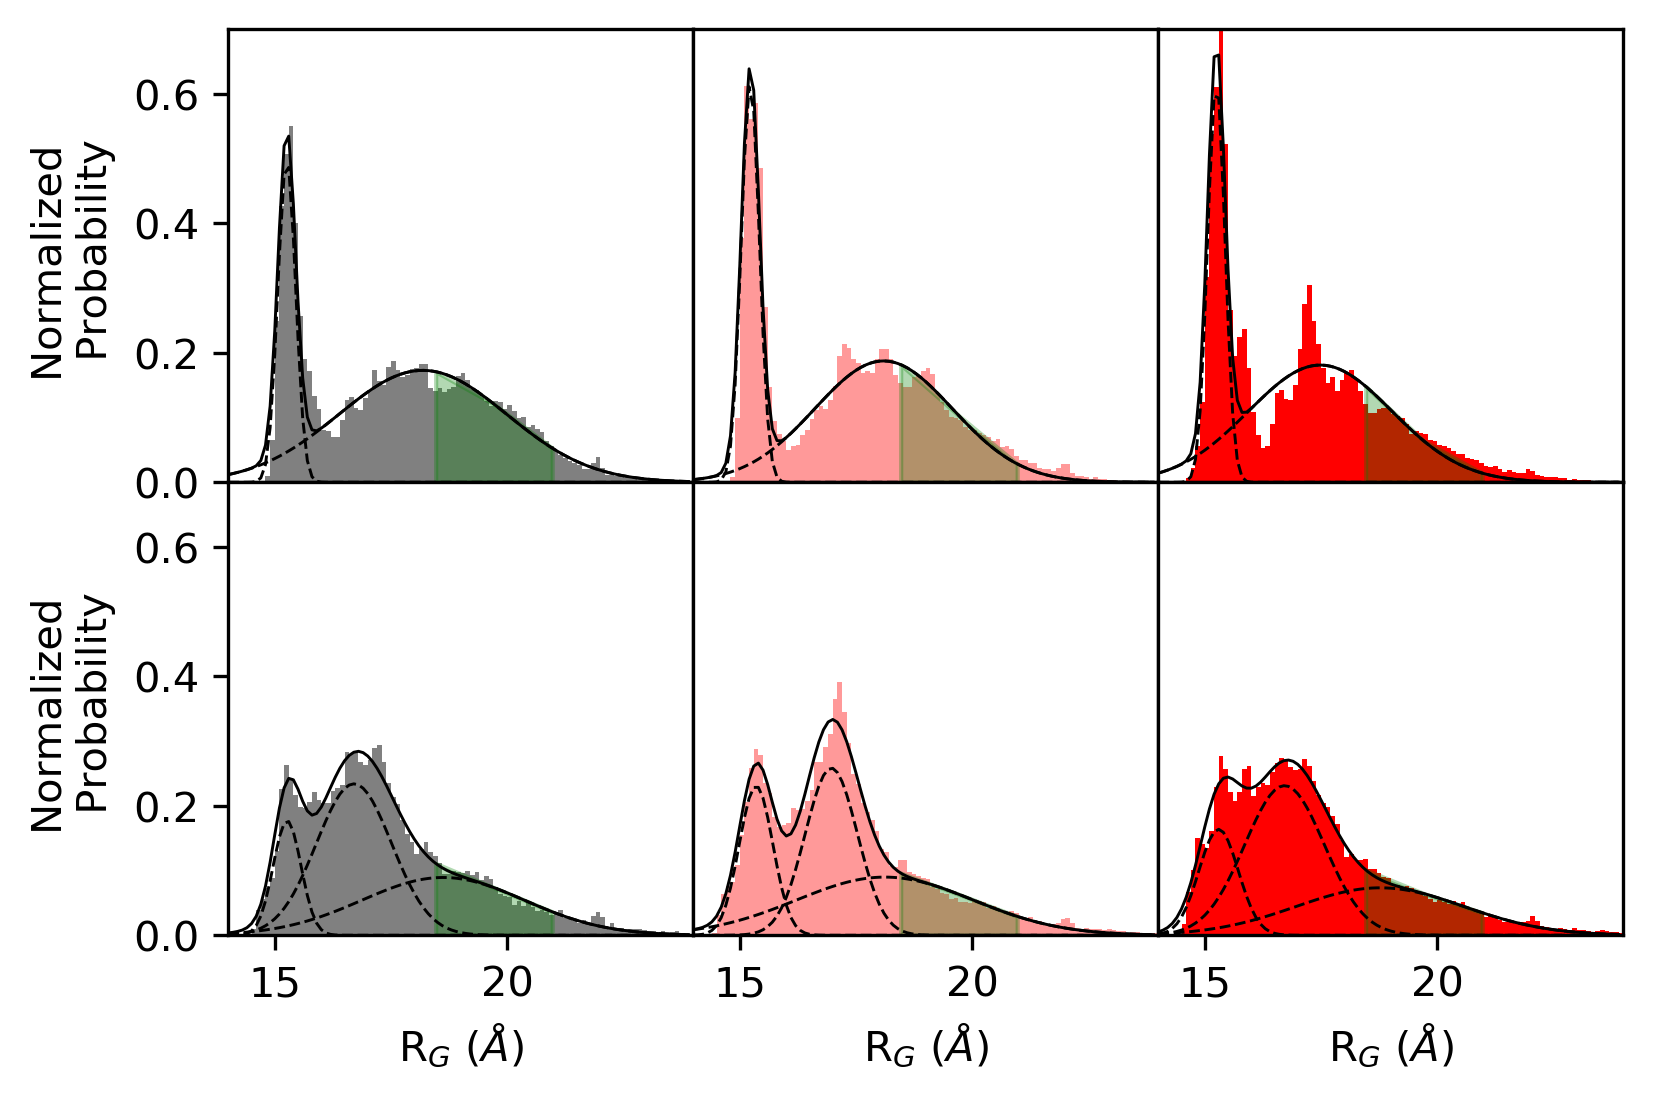

In [188]:
plt.figure(dpi=300,figsize=(6,4))
plt.subplot(2,3,1)
plt.hist(lhch0m,bins=100,range=(14,24),density=True,color='gray')
plt.plot(t1[1][:-1],GaussianTwoPeaks(t1[1][:-1],*p1),lw=0.7,color='black')
plt.plot(t1[1][:-1],Gaussian(t1[1][:-1],*p1[0:3]),"--",lw=0.7,color='black')
plt.plot(t1[1][:-1],Gaussian(t1[1][:-1],*p1[3:6]),"--",lw=0.7,color='black')
plt.fill_between([succMean-succStd,succMean,succMean+succStd],\
                 [GaussianTwoPeaks(succMean-succStd,*p1),GaussianTwoPeaks(succMean,*p1)\
                  ,GaussianTwoPeaks(succMean+succStd,*p1)]\
                ,zorder=2,color='green',alpha=0.3)
plt.ylim([0,0.7])
plt.xlim([14,24])
plt.ylabel('Normalized \n Probability')
plt.subplot(2,3,2)
plt.hist(lhch15m,bins=100,range=(14,24),density=True,color='red',alpha=0.4)
plt.plot(t2[1][:-1],GaussianTwoPeaks(t2[1][:-1],*p2),lw=0.7,color='black')
plt.plot(t2[1][:-1],Gaussian(t2[1][:-1],*p2[0:3]),"--",lw=0.7,color='black')
plt.plot(t2[1][:-1],Gaussian(t2[1][:-1],*p2[3:6]),"--",lw=0.7,color='black')
plt.fill_between([succMean-succStd,succMean,succMean+succStd],\
                 [GaussianTwoPeaks(succMean-succStd,*p2),GaussianTwoPeaks(succMean,*p2)\
                  ,GaussianTwoPeaks(succMean+succStd,*p2)]\
                ,zorder=2,color='green',alpha=0.3)
plt.xlim([14,24])
plt.ylim([0,0.7])
plt.yticks([])
plt.subplot(2,3,3)


plt.hist(lhch5m,bins=100,range=(14,24),density=True,color='red')
plt.plot(t3[1][:-1],GaussianTwoPeaks(t3[1][:-1],*p3),lw=0.7,color='black')
plt.plot(t3[1][:-1],Gaussian(t3[1][:-1],*p3[0:3]),"--",lw=0.7,color='black')
plt.plot(t3[1][:-1],Gaussian(t3[1][:-1],*p3[3:6]),"--",lw=0.7,color='black')
plt.fill_between([succMean-succStd,succMean,succMean+succStd],\
                 [GaussianTwoPeaks(succMean-succStd,*p3),GaussianTwoPeaks(succMean,*p3)\
                  ,GaussianTwoPeaks(succMean+succStd,*p3)]\
                ,zorder=2,color='green',alpha=0.3)
plt.ylim([0,0.7])
plt.xlim([14,24])
plt.yticks([])


plt.subplot(2,3,4)
plt.hist(lcch0m,bins=100,range=(14,24),density=True,color='gray')
plt.plot(t4[1][:-1],GaussianThreePeaks(t4[1][:-1],*p4),lw=0.7,color='black')
plt.plot(t4[1][:-1],Gaussian(t4[1][:-1],*p4[0:3]),"--",lw=0.7,color='black')
plt.plot(t4[1][:-1],Gaussian(t4[1][:-1],*p4[3:6]),"--",lw=0.7,color='black')
plt.plot(t4[1][:-1],Gaussian(t4[1][:-1],*p4[6:9]),"--",lw=0.7,color='black')
plt.fill_between([succMean-succStd,succMean,succMean+succStd],\
                 [GaussianThreePeaks(succMean-succStd,*p4),GaussianThreePeaks(succMean,*p4)\
                  ,GaussianThreePeaks(succMean+succStd,*p4)]\
                ,zorder=2,color='green',alpha=0.3)
plt.ylim([0,0.7])
plt.xlim([14,24])
plt.xlabel('R$_G$ ($\AA$)')
plt.ylabel('Normalized \n Probability')
plt.subplot(2,3,5)
plt.hist(lcch15m,bins=100,range=(14,24),density=True,color='red',alpha=0.4)
plt.plot(t5[1][:-1],GaussianThreePeaks(t5[1][:-1],*p5),lw=0.7,color='black')
plt.plot(t5[1][:-1],Gaussian(t5[1][:-1],*p5[0:3]),"--",lw=0.7,color='black')
plt.plot(t5[1][:-1],Gaussian(t5[1][:-1],*p5[3:6]),"--",lw=0.7,color='black')
plt.plot(t5[1][:-1],Gaussian(t5[1][:-1],*p5[6:9]),"--",lw=0.7,color='black')
plt.fill_between([succMean-succStd,succMean,succMean+succStd],\
                 [GaussianThreePeaks(succMean-succStd,*p5),GaussianThreePeaks(succMean,*p5)\
                  ,GaussianThreePeaks(succMean+succStd,*p5)]\
                ,zorder=2,color='green',alpha=0.3)
plt.xlabel('R$_G$ ($\AA$)')
plt.xlim([14,24])
plt.ylim([0,0.7])
plt.yticks([])
plt.subplot(2,3,6)
plt.hist(lcch5m,bins=100,range=(14,24),density=True,color='red')
plt.plot(t6[1][:-1],GaussianThreePeaks(t6[1][:-1],*p6),lw=0.7,color='black')
plt.plot(t6[1][:-1],Gaussian(t6[1][:-1],*p6[0:3]),"--",lw=0.7,color='black')
plt.plot(t6[1][:-1],Gaussian(t6[1][:-1],*p6[3:6]),"--",lw=0.7,color='black')
plt.plot(t6[1][:-1],Gaussian(t6[1][:-1],*p6[6:9]),"--",lw=0.7,color='black')
plt.fill_between([succMean-succStd,succMean,succMean+succStd],\
                 [GaussianThreePeaks(succMean-succStd,*p6),GaussianThreePeaks(succMean,*p6)\
                  ,GaussianThreePeaks(succMean+succStd,*p6)]\
                ,zorder=2,color='green',alpha=0.3)
plt.xlim([14,24])
plt.ylim([0,0.7])
plt.xlabel('R$_G$ ($\AA$)')
plt.yticks([])
plt.subplots_adjust(hspace=0,wspace=0)

In [190]:
print (p1)
print (p2)
print (p3)
print (p4)
print (p5)
print (p6)

[ 0.23748536 15.25811954  0.1900882   0.7831696  18.18373596  1.80704172]
[ 0.30097339 15.226385    0.19466087  0.69525897 18.09262548  1.47914923]
[ 0.28990193 15.24812457  0.18745508  0.70012477 17.48357752  1.54211915]
[ 0.13281232 15.26507176  0.29936009  0.39138638 18.62087002  1.74871303
  0.47451806 16.70330777  0.80896425]
[ 0.20999971 15.35074079  0.36317555  0.42768021 18.1200979   1.89837213
  0.36410048 16.96877391  0.56222357]
[ 0.17463744 15.29719189  0.42542107  0.33151948 18.76932186  1.80357468
  0.49539876 16.71526577  0.85494179]


In [198]:
# we want to show the representative strucs at each peak of the RoG distritubtion, to do that, we need the trial ID
# first.

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    t = 0
    if np.abs(array[idx]-value) < 0.5:
        t = idx
    else:
        t = 9999
    
        
    return t
        

def RepStruc(TmIndex,RG,value=15.2):
    """
    Get the RG of CaM before forming the encounter complex
    """
    rg = {}
    for i in range(len(TmIndex[1])):
        #print (i)
        idx = TmIndex[1][i]
        if idx > 1300:
            idx = 1300
        if idx == 0:
            idx = 1
        rgs = list(RG[i][:,1][:idx])
        idx = find_nearest(rgs,value)
        rg[i] = idx
        
        
        
    return rg



In [208]:
strucID = RepStruc(TmTime['linkerCoil']['CaMBRhelix']['0M'],RoG['linkerCoil']['CaMBRhelix']['0M'],value=17.0)

In [209]:
print (strucID)

{0: 34, 1: 30, 2: 23, 3: 16, 4: 15, 5: 88, 6: 9999, 7: 21, 8: 59, 9: 433, 10: 20, 11: 45, 12: 58, 13: 9999, 14: 48, 15: 97, 16: 30, 17: 314, 18: 37, 19: 98, 20: 44, 21: 81, 22: 410, 23: 241, 24: 27, 25: 17, 26: 579, 27: 21, 28: 107, 29: 119, 30: 9999, 31: 66, 32: 27, 33: 169, 34: 73, 35: 54, 36: 91, 37: 55, 38: 78, 39: 32, 40: 131, 41: 29, 42: 36, 43: 93, 44: 90, 45: 22, 46: 123, 47: 37, 48: 9999, 49: 84, 50: 61, 51: 96, 52: 36, 53: 13, 54: 92, 55: 107, 56: 158, 57: 9999, 58: 249, 59: 200, 60: 112, 61: 123, 62: 21, 63: 51, 64: 15, 65: 144, 66: 58, 67: 9, 68: 298, 69: 9999, 70: 8, 71: 9999, 72: 60, 73: 371, 74: 34, 75: 32, 76: 9999, 77: 9999, 78: 15, 79: 372, 80: 89, 81: 39, 82: 9999, 83: 29, 84: 264, 85: 9999, 86: 217, 87: 38, 88: 74, 89: 9999, 90: 105, 91: 13, 92: 729, 93: 33, 94: 360, 95: 174, 96: 7, 97: 21, 98: 9999, 99: 31, 100: 177, 101: 9999, 102: 9999, 103: 24, 104: 114, 105: 27, 106: 19, 107: 16, 108: 42, 109: 99, 110: 44, 111: 46, 112: 131, 113: 169, 114: 9999, 115: 26, 116: 8

In [210]:
print (succMean)
print (succStd)

19.712961576354683
1.2524965491123725


 The average time can be used to calculate the association rate
$K_a = \frac{1}{T_{50}} \frac{V_{box}}{1/N_A}$

In [99]:
# association rate
def Ka(x):
    Time = x*1e-9 # s
    Vbox = 3.375e-21 # L, is the volume of the box
    Na  = 6.022e23
    return (1/Time)*Vbox*Na

In [100]:
KaLHCH = [Ka(i) for i in LHCH]
KaLCCH = [Ka(i) for i in LCCH]

In [102]:
# percentage error of Ka is the same as that of encounter time
# as Ka = ectime^{-1}*constant
LHCHerror = np.asarray(LHCHstd)/np.asarray(LHCH)
LCCHerror = np.asarray(LCCHstd)/np.asarray(LCCH)

KaLHCHstd = np.asarray(KaLHCH)*LHCHerror
KaLCCHstd = np.asarray(KaLCCH)*LCCHerror


In [106]:
print (np.asarray(KaLHCH)/1e8,KaLHCHstd/1e8)
print (np.asarray(KaLCCH)/1e8,KaLCCHstd/1e8)

[12.13026947  9.24299719  5.90549914] [1.119218   0.85178998 0.71681881]
[11.64792653  7.53949205  7.02317014] [1.26514188 0.84239262 0.8534329 ]


In [101]:
aa = np.asarray([1,2,3])
bb = np.asarray([1,2,3])
print (aa*bb)

[1 4 9]


([<matplotlib.axis.XTick at 0x7fe7a12e0b00>,
 <a list of 2 Text xticklabel objects>)

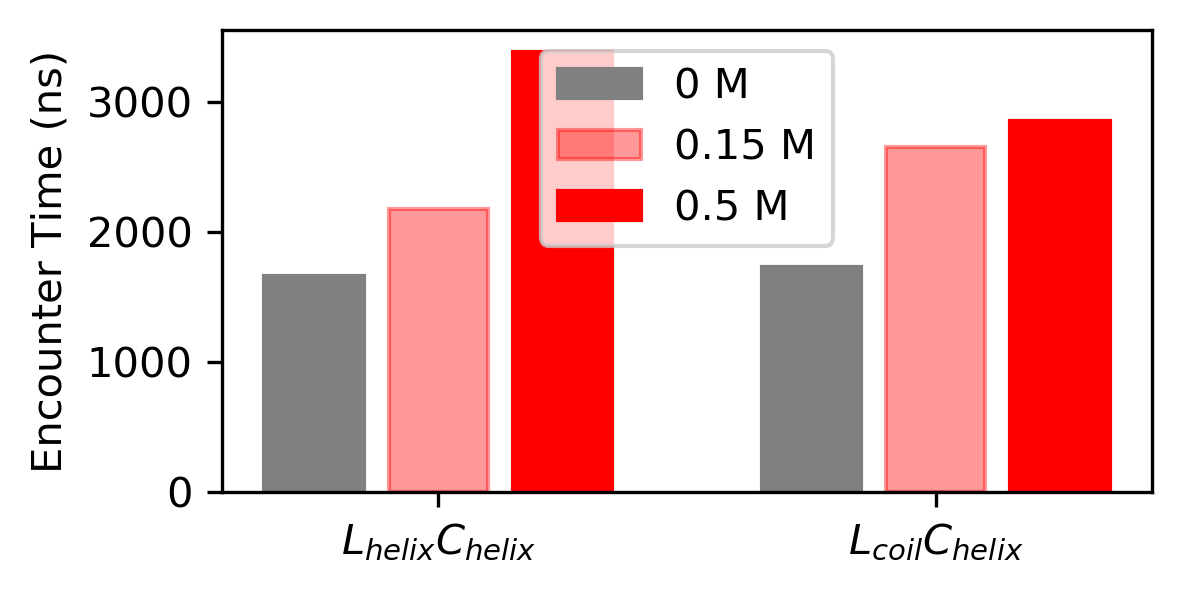

In [52]:
colors = ['grey','red','red']
Label1 = ['0 M','0.15 M', '0.5 M']

plt.figure(figsize=(4,2),dpi=300)

barlist1 = plt.bar(np.arange(3),LHCH)
for i,j in enumerate(barlist1):
    j.set_color(colors[i])
    j.set_label(Label1[i])
    if i == 1:
        j.set_alpha(0.4)
barlist2 = plt.bar(np.arange(4,7),np.asarray([1e9/popt3[1],1e9/popt4[1],1e9/popt5a[1]])*4)

for i,j in enumerate(barlist2):
    j.set_color(colors[i])
    #j.set_label(Label1[i])
    if i == 1:
        j.set_alpha(0.4)

plt.ylabel('Encounter Time (ns)')
plt.legend()
plt.xticks([1,5],['$L_{helix}C_{helix}$','$L_{coil}C_{helix}$'])

In [111]:
print (np.asarray(KaLHCH)/1e8)
print (np.asarray(KaLCCH)/1e8)

[11.17933719  9.49426703  6.30446471]
[10.56293354  7.45027333  8.8549393 ]


In [119]:
print (popt1)
print (popt2)
print (popt3)
print (popt4)
print (popt5)
print (popt6)
print (popt7)
print (popt8)

[2.91538473e-03 3.36618251e+06]
[2.83206631e-03 3.21187787e+06]
[2.96581528e-03 3.46017178e+06]
[2.08852909e-03 2.17457118e+06]
[4.75110193e-03 4.85720951e+06]
[2.75565484e-03 3.25390004e+06]
[4.44828332e-03 4.61347170e+06]
[1.92026848e-03 1.61255768e+06]


In [138]:
# Now calculate the CaMBR-CaM dis/ RMSD to native complex to loate these encounter complex

def contactDistRMSD(contact,rmsd,dis,Tm=50):
    """
    When form Tm contacts, get the RMSD/Dis values
    """
    locs = []
    for i in range(100):
        if len(contact[i].shape) > 1: 
            indx = np.argmax(np.sum(contact[i][:,1:3],axis=1)>Tm)
            
            RMSDvalue = rmsd[i][:,1][indx]
            DisValue = dis[i][:,1][indx]
            locs.append([DisValue,RMSDvalue])
        
    return np.asarray(locs)

In [139]:
# encounter complex locations
ecLocs = {i:{} for i in CaMcases}
for i in ['linkerCoil','linkerHelix']: #,'linkerCoilimpairedDomain']:
    ecLocs[i]['CaMBRhelix'] = {j:contactDistRMSD(contact[i]['CaMBRhelix'][j],\
                                                 rmsd[i]['CaMBRhelix'][j],\
                                                 dis[i]['CaMBRhelix'][j],Tm=50) for j in ionics}
    
    ecLocs[i]['CaMBRcoil'] = {j:contactDistRMSD(contact[i]['CaMBRcoil'][j],\
                                                rmsd[i]['CaMBRcoil'][j],\
                                                dis[i]['CaMBRcoil'][j],\
                                                Tm=50) for j in ionics}
    
ecLocs['linkerHelix']['CaMBRhelix']['0.5M'] = contactDistRMSD(contact['linkerHelix']['CaMBRhelix']['0.5M'],\
                                                              rmsd['linkerHelix']['CaMBRhelix']['0.5M'],\
                                                              dis['linkerHelix']['CaMBRhelix']['0.5M'],
                                                              Tm=50)

ecLocs['linkerCoil']['CaMBRhelix']['0.5M'] = contactDistRMSD(contact['linkerCoil']['CaMBRhelix']['0.5M'],\
                                                             rmsd['linkerCoil']['CaMBRhelix']['0.5M'],\
                                                             dis['linkerCoil']['CaMBRhelix']['0.5M'],
                                                             Tm=50)

(0, 65)

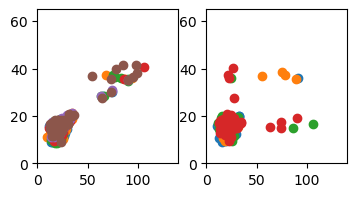

In [145]:
plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0M'][:,1])
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.15M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.15M'][:,1])
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,1])

plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0M'][:,0],ecLocs['linkerCoil']['CaMBRhelix']['0M'][:,1])
plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0.15M'][:,0],ecLocs['linkerCoil']['CaMBRhelix']['0.15M'][:,1])
plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerCoil']['CaMBRhelix']['0.5M'][:,1])
plt.xlim([0,140])
plt.ylim([0,65])

plt.subplot(1,2,2)
plt.scatter(ecLocs['linkerHelix']['CaMBRcoil']['0M'][:,0],ecLocs['linkerHelix']['CaMBRcoil']['0M'][:,1])
plt.scatter(ecLocs['linkerHelix']['CaMBRcoil']['0.15M'][:,0],ecLocs['linkerHelix']['CaMBRcoil']['0.15M'][:,1])
#plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,1])

plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0M'][:,0],ecLocs['linkerCoil']['CaMBRcoil']['0M'][:,1])
plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0.15M'][:,0],ecLocs['linkerCoil']['CaMBRcoil']['0.15M'][:,1])
#plt.scatter(ecLocs['linkerCoil']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerCoil']['CaMBRhelix']['0.5M'][:,1])
plt.xlim([0,140])
plt.ylim([0,65])

In [147]:
import pickle

In [148]:
f = open('DomainConstraintsmapling','rb')
sampling = pickle.load(f)
f.close()

# 0.5M sampling
f = open('DomainConstraintsmapling5M','rb')
M5sampling = pickle.load(f)
f.close()

In [149]:
for i in sampling.keys():
    energy = -0.593*np.log(sampling[i][2]/np.min(sampling[i][2]))
    sampling[i].append(energy)
    print (np.min(energy),np.max(energy))
for i in M5sampling.keys():
    energy = -0.593*np.log(M5sampling[i][2]/np.min(M5sampling[i][2]))
    M5sampling[i].append(energy)
    print (np.min(energy),np.max(energy))

-5.353701773658445 0.0
-5.496550100415455 0.0
-5.506165680887278 0.0
-5.539862355716352 0.0
-5.526099388189316 0.0
-5.475538089790116 0.0
-5.548603847897024 0.0
-5.676809948843418 0.0
-5.384678712767622 0.0
-5.593087016473104 0.0


Text(0.5, 0, 'CaMBR-CaM \n dist. ($\\AA$)')

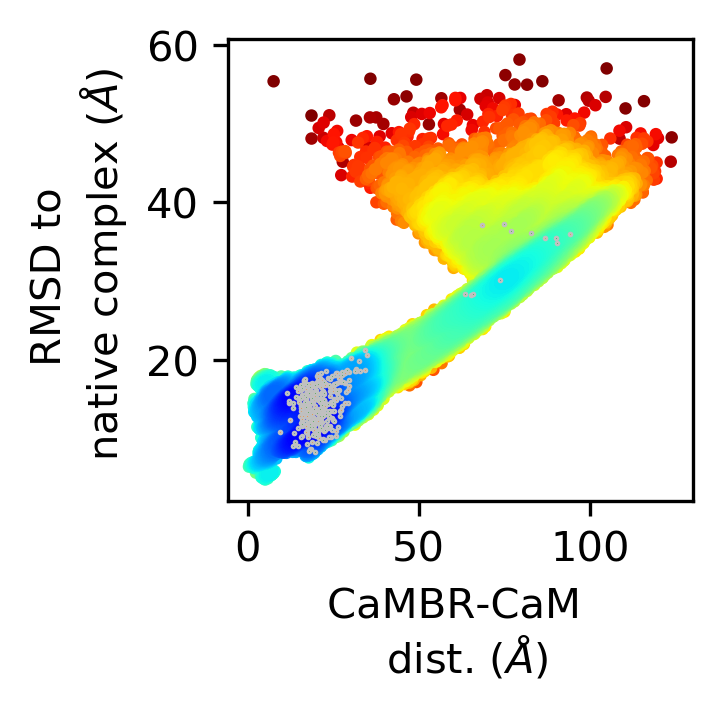

In [165]:
plt.figure(figsize=(2,2),dpi=300)
area=4
plt.scatter(sampling['LHCH0'][0],sampling['LHCH0'][1],c=sampling['LHCH0'][3],s=area,vmin=-6,cmap='jet')


area2=0.3
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0M'][:,1],s=area2,edgecolor='silver',lw=0.8)
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.15M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.15M'][:,1],s=area2,edgecolor='silver',lw=0.8)
plt.scatter(ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,0],ecLocs['linkerHelix']['CaMBRhelix']['0.5M'][:,1],s=area2,edgecolor='silver',lw=0.8)

plt.ylabel('RMSD to \n native complex ($\AA$)')
plt.xlabel('CaMBR-CaM \n dist. ($\AA$)')

(0, 60)

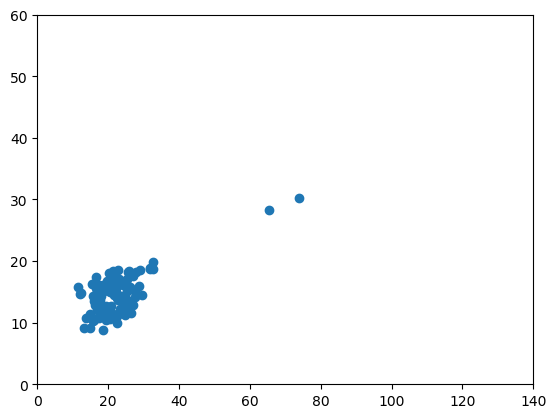

In [135]:
plt.scatter(aa[:,0],aa[:,1])
plt.xlim([0,140])
plt.ylim([0,60])

In [ ]:
def readRMSD(Dir):
    """
    read in the rmsd values of the N/C domains
    """
    idx = 0
    for i in range(1,101):
        Nrmsdfile = path.join(Dir,str(i),'Nrmsd.dat')
        Crmsdfile = path.join(Dir,str(i),'Crmsd.dat')
        Allrmsdfile = path.join(Dir,str(i),'rmsd.dat')
        disfile = path.join(Dir,str(i),'dis.dat')
        if path.exists(Nrmsdfile):
            idx += 1
            #print (i)
            tempN = np.loadtxt(Nrmsdfile,skiprows=2,comments="#",usecols=[1])
            tempC = np.loadtxt(Crmsdfile,skiprows=2,comments="#",usecols=[1])
            allrmsd = np.loadtxt(Allrmsdfile,skiprows=2,comments="#",usecols=[1])
            dis = np.loadtxt(disfile,skiprows=2,comments="#",usecols=[1])
            if idx == 1:
                Ncoord = tempN
                Ccoord = tempC
                Allrmsd = allrmsd
                alldis = dis
            else:
                Ncoord = np.hstack((Ncoord,tempN))
                Ccoord = np.hstack((Ccoord,tempC))
                Allrmsd = np.hstack((Allrmsd,allrmsd))
                alldis = np.hstack((alldis,dis))
    return Ncoord, Ccoord,Allrmsd,alldis
            
    #print (i,status)

In [76]:
# now check the specific residue-residue contact in the encounter complex 
Ncontacts = "/home/binsun/plotfigures/DHkinetics/martinicg/CaMBRcoil/0M/10/Ncontact"
Ccontacts = "/home/binsun/plotfigures/DHkinetics/martinicg/CaMBRcoil/0M/10/Ccontact"

In [55]:
def getTmContact(cam,cambr='CaMBRcoil',ionic='0M'):
    """
    Get the residue-specific contact at the enconter complex
    """
    
    total = [[i,0.0] for i in range(1,144)] # create a list to store the contact for each residue
    
    for i in range(50):
        Nfile = os.path.join(os.getcwd(),"martinicg",cam,cambr,ionic,str(i+1),"Ncontact")
        Cfile = os.path.join(os.getcwd(),"martinicg",cam,cambr,ionic,str(i+1),"Ccontact")
        with open(Nfile,'r') as f:
            Ndata = f.readlines()

        with open(Cfile,'r') as f:
            Cdata = f.readlines()
            
        nlist=Ndata[TmTime[cam][cambr][ionic][1][i]]
        clist=Cdata[TmTime[cam][cambr][ionic][1][i]]
        
        if len(clist.split()) > 2:
            cres = [int(i.split("-")[0]) for i in clist.split()[1:]]
            aa = [[i,cres.count(i)] for i in set(cres)]
            for j in aa:
                total[j[0]-1][1] = total[j[0]-1][1]+j[1] 
            
        if len(nlist.split()) > 2:
            nres = [int(i.split("-")[0]) for i in nlist.split()[1:]]
            aa = [[i,nres.count(i)] for i in set(nres)]
            for j in aa:
                total[j[0]-1][1] = total[j[0]-1][1]+j[1]
                
    tt = list(zip(*total))
    
    tt[0] = np.asarray(tt[0]) + 4 # first residue starts at 5 in pdb 3cln
    tt[1] = np.asarray(tt[1])/50
    plt.figure(dpi=130)
    plt.bar(tt[0]+4,tt[1])
    plt.xlabel('CaM residue')
    plt.ylabel('Contact frequency with CaMBR')
    plt.ylim([0,2.0])
    
                
    return tt


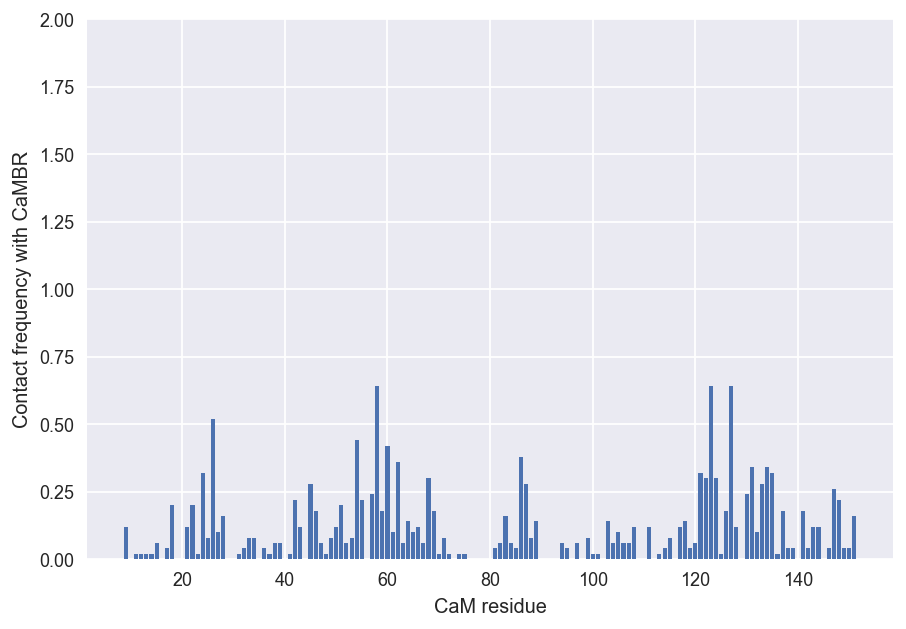

In [74]:
LCCC0M=getTmContact('linkerCoil','CaMBRcoil','0M')

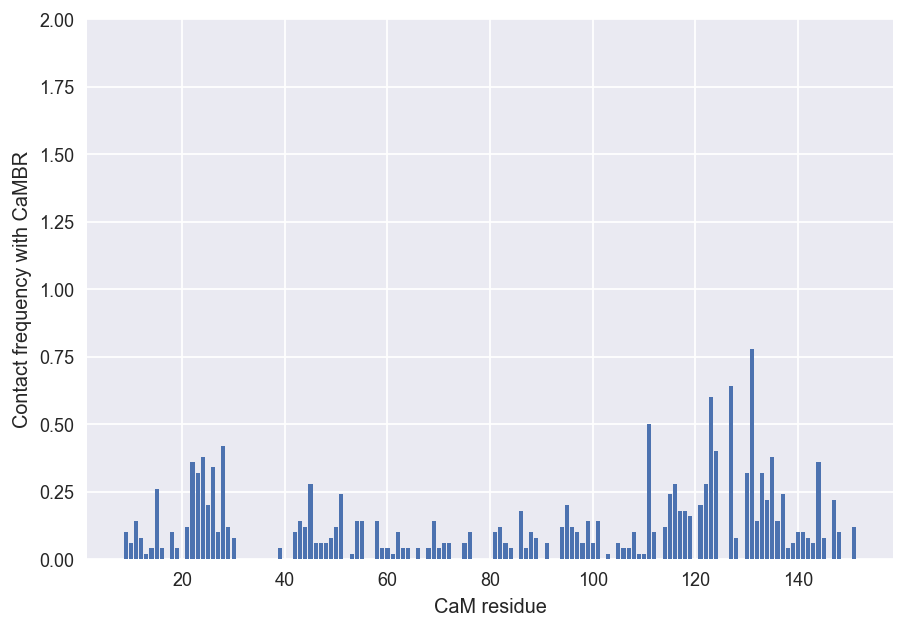

In [75]:
LCCC15M=getTmContact('linkerCoil','CaMBRcoil','0.15M')

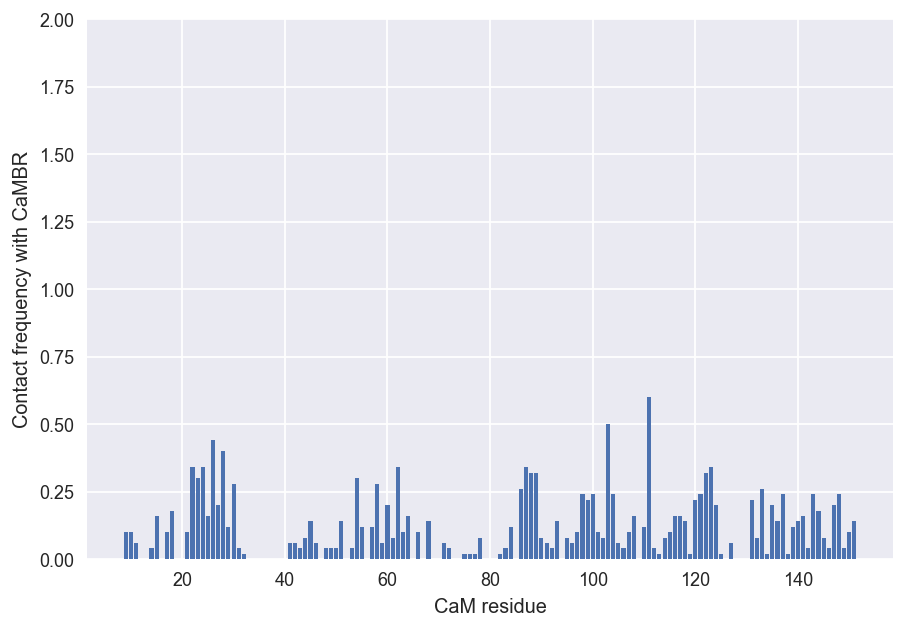

In [76]:
LCCH0M=getTmContact('linkerCoil','CaMBRhelix','0M')

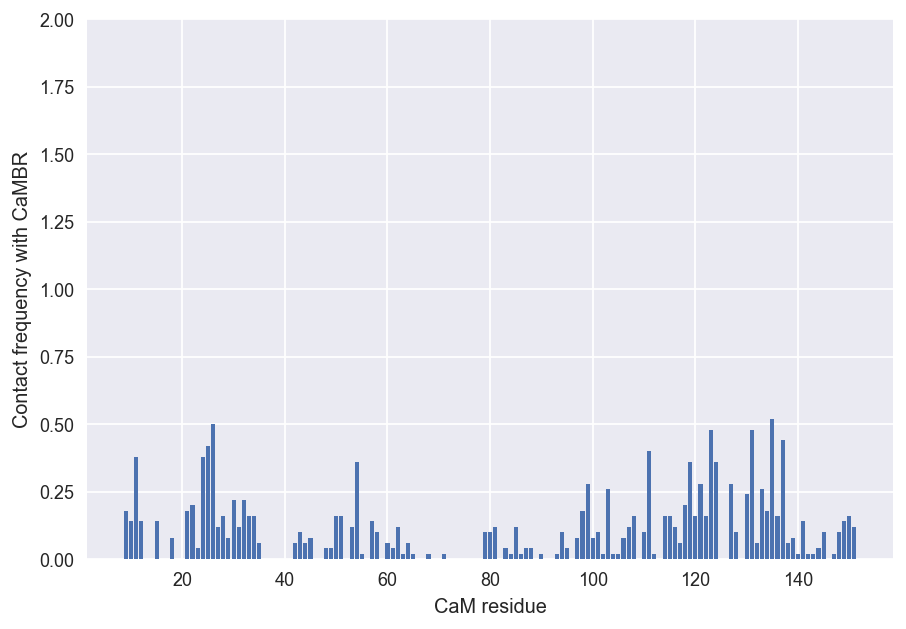

In [77]:
LCCH15M=getTmContact('linkerCoil','CaMBRhelix','0.15M')

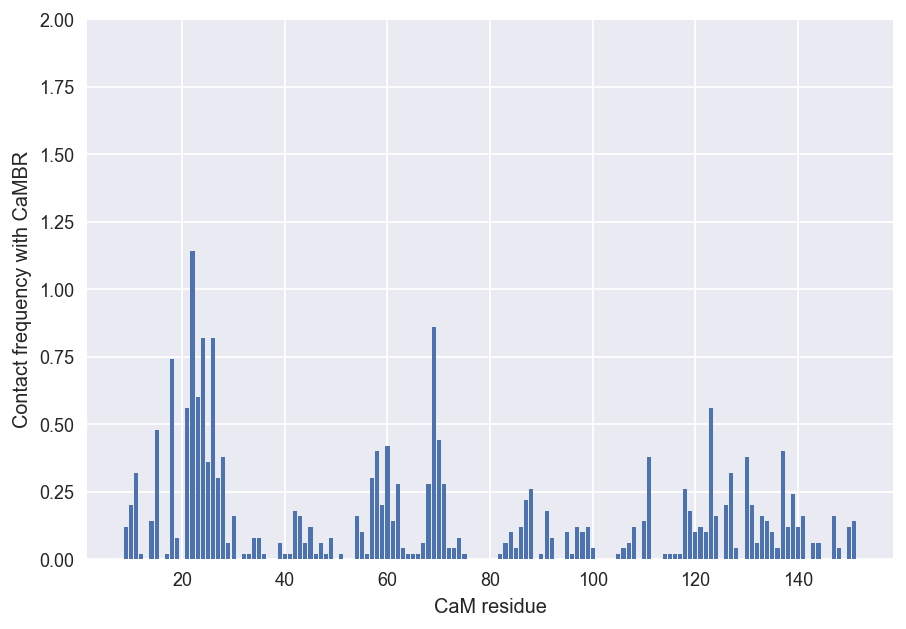

In [78]:
LHCH0M=getTmContact('linkerHelix','CaMBRhelix','0M')

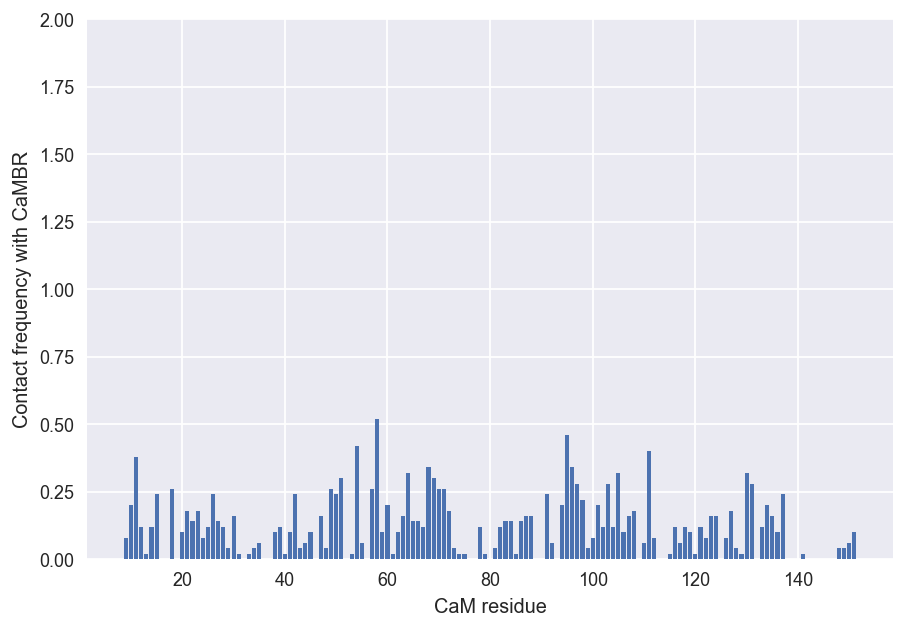

In [79]:
LHCH15M=getTmContact('linkerHelix','CaMBRhelix','0.15M')

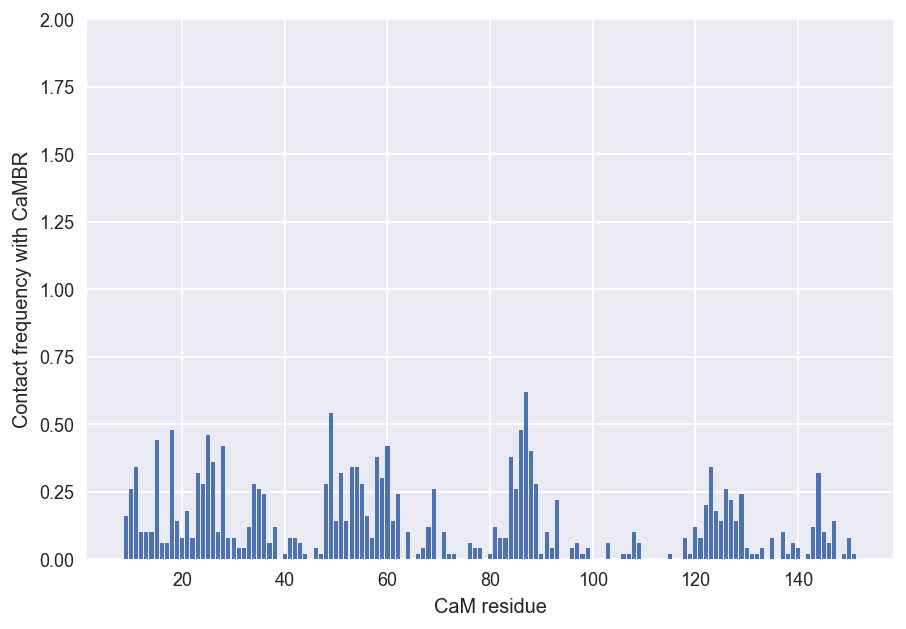

In [80]:
LCDCC0M=getTmContact('linkerCoilimpairedDomain','CaMBRcoil','0M')

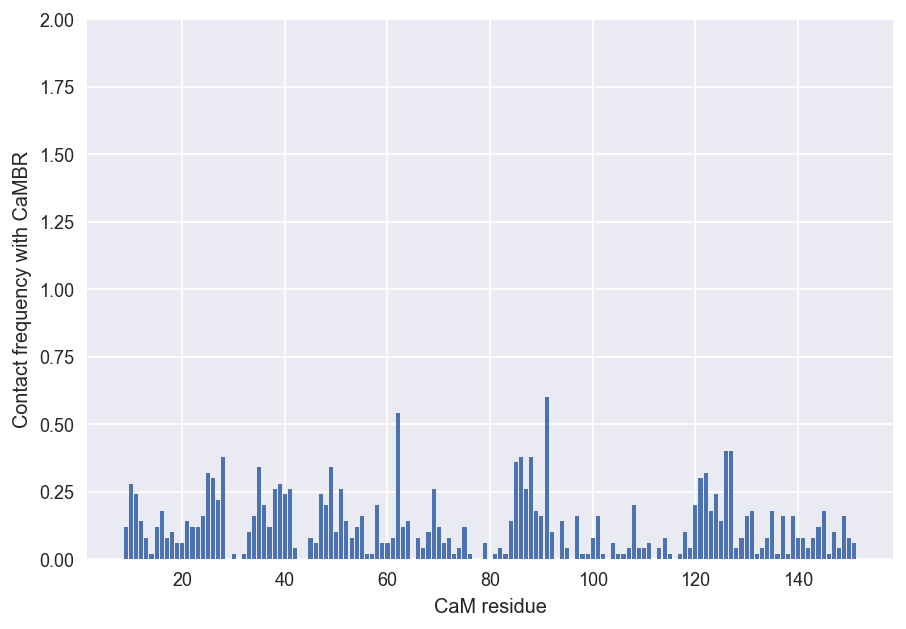

In [81]:
LCDCC15M=getTmContact('linkerCoilimpairedDomain','CaMBRcoil','0.15M')

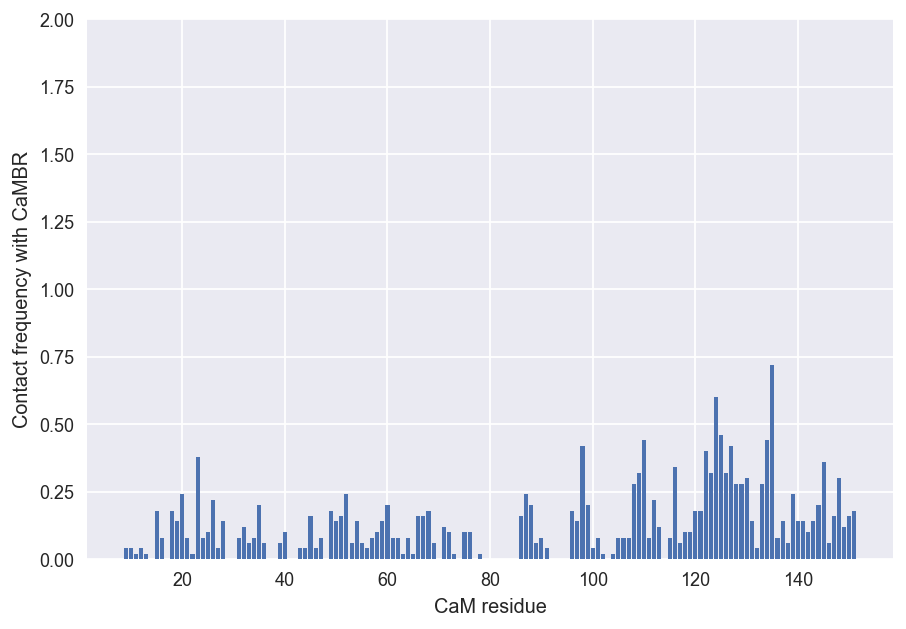

In [82]:
LCDCH0M=getTmContact('linkerCoilimpairedDomain','CaMBRhelix','0M')

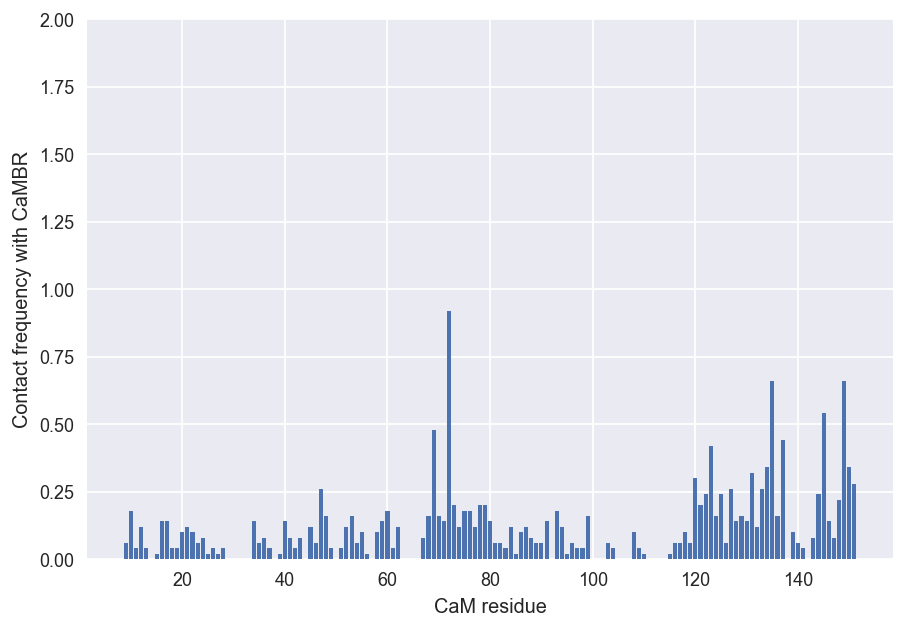

In [83]:
LCDCH15M=getTmContact('linkerCoilimpairedDomain','CaMBRhelix','0.15M')

In [84]:
helix015 = getTmContact("CaMBRhelix","0.15M")

FileNotFoundError: [Errno 2] No such file or directory: '/home/binsun/plotfigures/CaMBRkinetics/martinicg/CaMBRhelix/0.15M/0M/1/Ncontact'

In [219]:
print (np.max(helix015[1]))

2.24
